|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 10.7, Conduction de la chaleur dans une ailette
<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-7.png'>



In [1]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions

W,B,h,k,T,T_A,delta_z,z,T_0,L=sp.symbols('W,B,h,k,T,T_A,delta_z,z,T_0,L')                                                            
q=sp.symbols('q')
T=sp.Function('T')(z)     

'Bilan différentiel'

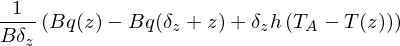

In [3]:
#
# Bilan dans l'ailette
#
eq=(2*B*W*q(z)-2*B*W*q(z+delta_z))-2*W*delta_z*h*(T-T_A)
eq=(eq/(2*B*W*delta_z)).simplify()
display('Bilan différentiel',eq)

'Équation du bilan différentiel après limite'

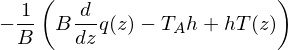

In [4]:
# limite quand dz > 0
eq=sp.limit(eq,delta_z,0).doit()
display('Équation du bilan différentiel après limite',eq)

'Après substitution de la loi de Fourier pour avoir une équation en fonction de T'

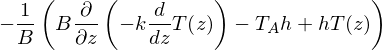

In [5]:
fourier=-k*sp.diff(T,z)
eq=eq.subs(q(z),fourier)
display('Après substitution de la loi de Fourier pour avoir une équation en fonction de T',eq)

In [6]:
T=sp.dsolve(eq,T)
display('Solution générale incluant les constantes inconnues',T)

'Solution générale incluant les constantes inconnues'

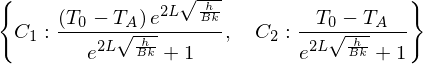

In [7]:
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
condition_1=sp.Eq(T.rhs.diff(z).subs(z,L    ),0)
condition_2=sp.Eq(T.rhs.subs(z,0)-T_0,0)
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2'))    # pour trouver C1 et C2
display(constantes)

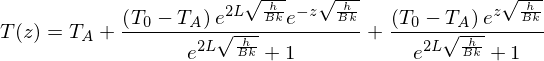

In [8]:
T=T.subs(constantes)
display(T)

### * 1  Exemples de calcul: quantité de chaleur dissipée

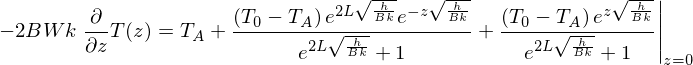

In [9]:
#
# La méthode la plus simple est de calculer le flux qui passe à
# la base de l'ailette et le multiplier par la surface de la section
#
QD=2*B*W*(-k*sp.diff(T,z).subs(z,0))
display(QD)

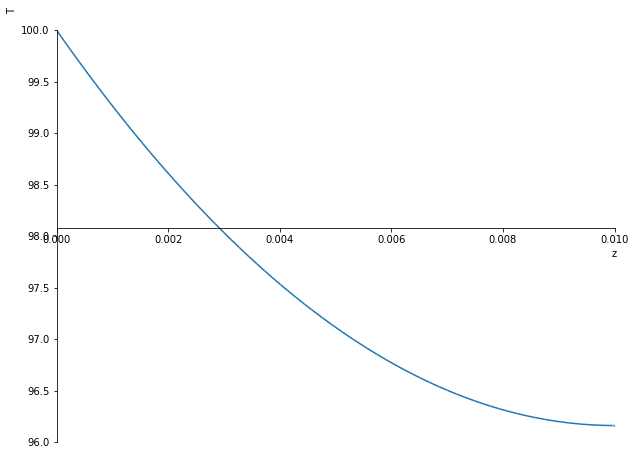

In [10]:
#
# Tracons le profil de température pour des valeurs de paramètres choisis
#
dico={'h':20,'k':20,'B':0.001,'T_0':100,'T_A':20,'L':0.01}
Tplot=T.rhs.subs(dico)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
sp.plot(Tplot,(z,0,L.subs(dico)),ylabel='T');

>> Comment calculer l'efficacité des ailettes: voyons le profil de température d'une autre ailette.

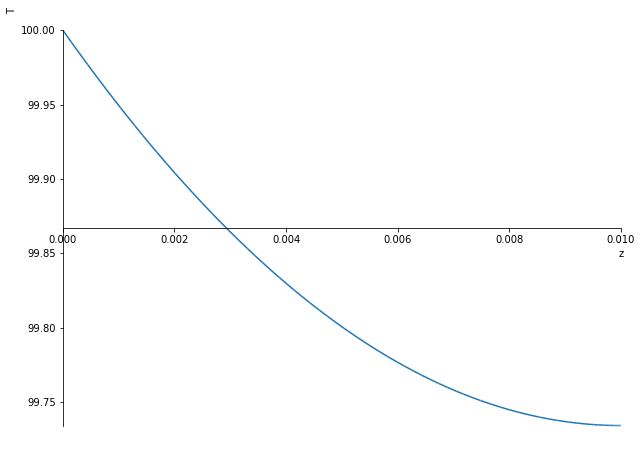

In [11]:
#
# Tracons le profil de température pour une ailette presque idéale
#
# Pourquoi cete ailette est-elle plus efficace que la précédente?
#
dico={'h':20,'k':300,'B':0.001,'T_0':100,'T_A':20,'L':0.01}
plt.rcParams['figure.figsize']=10,8
Tplot=T.rhs.subs(dico)
sp.plot(Tplot,(z,0,L.subs(dico)),xlabel='z',ylabel='T');

>> La quantité maximale de chaleur que peut dissiper une ailette est :  
<center>
$ Q_{max} = h A (T_0 -T_A) $
</center>
>> La quantité de chaleur dissipée par une ailette de section constante est : 
<center>
$ Q_{reel} = P \int _{0} ^{L} h (T_z - T_A) dz $ 
</center>
ou P est le périmètre de l'ailette. 
>> L'efficacité de l'ailette réelle est donc 
<center>
$ \eta = \frac {Q_{reel}} {Q_{max}} $
<center>

> * Exercice: calculez l'efficacité des deux ailettes ci-haut.